# Spline interpolacion
  

In [2]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
%matplotlib inline
#REF: Adaptado de  https://github.com/rrgalvan

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(3,5)$.

In [3]:
x0, x1, x2, x3 = -1, 0, 1, 3
_x = np.array([x0, x1, x2, x3])
y0, y1, y2, y3 =  5, 3, 3, 5
_y = np.array([y0, y1, y2, y3])

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ y $[0,1]$ y $[1,3]$ . Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,
  * $s_2(x) = a_2 + b_2 (x-x_2) + c_2 (x-x_2)^2 + d_2 (x-x_2)^3$,

es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3$.
  * $s_2(x) = a_2 + b_2 (x-1) + c_2 (x-1)^2 + d_2 (x-1)^3$,

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.
  * $s_2'(x) = b_2 + 2c_2(x-1) + 3d_2(x-1)^2$
  * $s_2''(x) = 2c_2 + 6d_2(x-1)$

Tenemos 12 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1,2$. Las ecuaciones son:

  * Interpolación (y continuidad en 0):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    * $s_2(1) = 3$, es decir, $a_2=3$.
    * $s_2(3) = 5$, es decir, $a_2 + 2b_2 + 4c_2 + 8d_2=5$.
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(0)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_1'(0) = s_2'(0)$, es decir, $b_1 = b_2-2c_2+3d_2 $.
    * $s_0''(0) = s_1''(0)$, es decir, $2c_0+6d_0 = 2c_1$.
    * $s_1''(0) = s_2''(0)$, es decir, $2c_1 = 2c_2-6d_2$.

  * Condiciones naturales en los extremos, $-1$ y $3$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_2''(3) = 0$, o sea $2c_2+12d_2=0$.


De estas ecuaciones tenemos directamente $a_0$, $a_1$, $a_2$ y $c_0$. Le damos valores a las variables en python:

In [4]:
a0 = 5
a1 = 3
a2 = 3
c0 = 0

Así, podemos eliminar la primera, tercera y séptima ecuación, llegando a un sistema de cinco ecuaciones con cinco incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$, $b_2$, $c_2$,$d_2$):

 * $b_0+d_0=3-a_0-c_0=-2$,
 * $b_1+c_1+d_1=3-a_1=0$,
 * $2b_2+4c_2+8d_2=5-a_2=2$,
 * $b_0+3d_0 - b_1 = -2c_0 = 0$,
 * $b_2-2c_2+3d_2-b_1=0$,
 * $6d_0 - 2c_1 = -2c_0=0$
 * $2c_2-6d_2-2c_1=0$,
 * $2c_2+12d_2=0$


La matriz y el segundo miembro asociados son:

In [5]:
A = np.array([
	[ 1, 1,   0,  0, 0, 0,  0,  0],
	[ 0, 0,   1,  1, 1, 0,  0,  0],
	[ 0, 0,   0,  0, 0, 2,  4,  8 ],
	[ 1, 3,  -1,  0, 0, 0,  0,  0],
	[ 0, 0,  -1,  0, 0, 1, -2,  3 ],
	[ 0, 6,   0, -2, 0, 0,  0,  0],
	[ 0, 0,   0, -2, 0, 0,  2, -6],
	[ 0, 0,   0,  0, 0, 0,  2, 12]])
b = np.array([-2, 0, 2, 0, 0, 0, 0, 0])

In [6]:
sol = solve(A,b)
print(sol)


[-2.31034483  0.31034483 -1.37931034  0.93103448  0.44827586  0.17241379
  0.62068966 -0.10344828]


Ahora podemos resolver este sistema usando la función `solve()` (incluida en el modulo "linalg" del paquete *numpy*):

In [7]:
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1, b2, c2, d2 = sol

# Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))
print ("a2, b2, c2, d2 = %f, %f, %f, %f" % (a2, b2, c2, d2))

a0, b0, c0, d0 = 5.000000, -2.310345, 0.000000, 0.310345
a1, b1, c1, d1 = 3.000000, -1.379310, 0.931034, 0.448276
a2, b2, c2, d2 = 3.000000, 0.172414, 0.620690, -0.103448


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$, $s_1$ y $s_2$ para representarlos gráficamente.

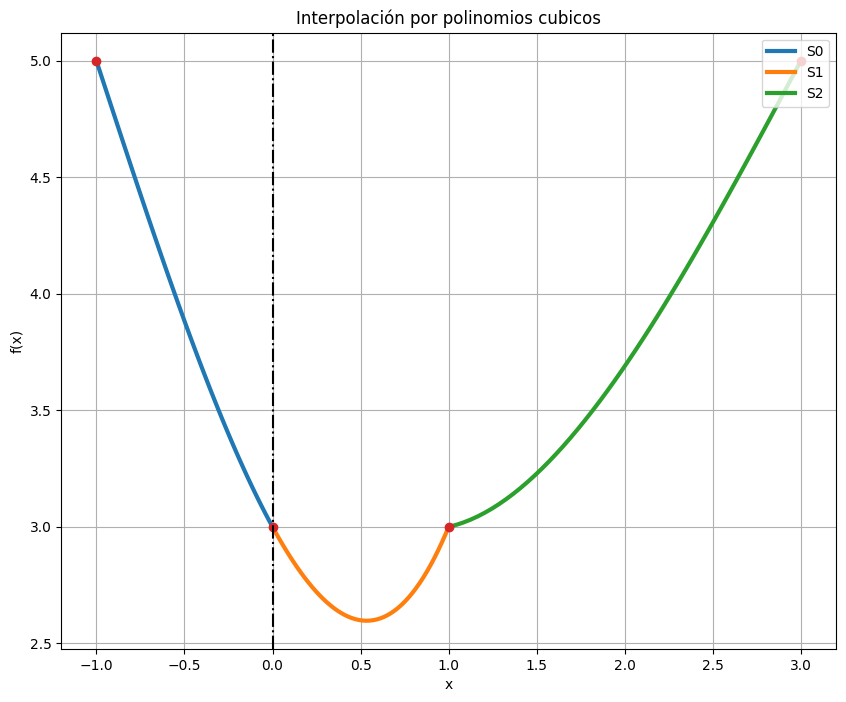

In [16]:
def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3
def s2(x):
  return a2 + b2*(x-1) + c2*(x-1)**2 + d2*(x-1)**3

xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)
xx2 = np.linspace(1,3)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(xx2, s2(xx2), lw=3, label = "S2")
#plt.plot(xs, cs(xs),"k-", label="Función interpolada Cubic")
plt.plot(_x, _y, 'o')
plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=10)
plt.xlabel("x", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Interpolación por polinomios cubicos")
plt.legend(loc = "upper right", fontsize= 10)
plt.grid()
plt.show()

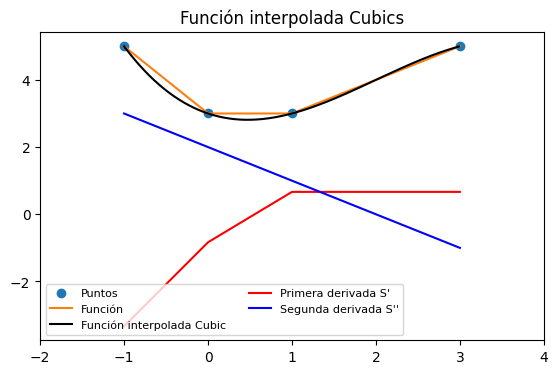

In [20]:
from scipy import *
from scipy.interpolate import CubicSpline
cs = CubicSpline(_x,_y)



xs = np.arange(-1,3,0.01)

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(_x, _y, "o", label="Puntos")
ax.plot(_x, _y, label="Función")
ax.plot(xs, cs(xs),"k-", label="Función interpolada Cubic")
ax.plot(_x, cs(_x, 1),"r-", label="Primera derivada S'")
ax.plot(_x, cs(_x, 2),"b-", label="Segunda derivada S''")
ax.set_xlim(-2, 4)
ax.set_title("Función interpolada Cubics")
ax.legend(loc='lower left',fontsize=8, ncol=2)
plt.show()


Adicionalmente se puede observar la continuidad de las derivadas.

In [12]:
#CubicSpline?
cs?